In [17]:
from __future__ import print_function, division

In [18]:
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt

# Part 1

In [19]:
def integrate(y, dx):
    """
    Takes an array of y-values and a step size dx of the corresponding x values 
    and numerically integrates the function, returning the final value
    """
    counter = 0
    for yi in y:
        counter += dx * yi
    return counter

In [20]:
def plot_fn(xarr, yarr, title=''):
    """
    Basic plotting function
    """
    plt.plot(xarr, yarr)
    plt.title(title)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

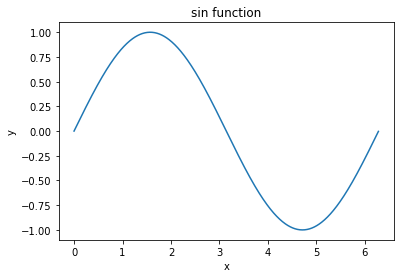

In [21]:
# TODO write code here to setup arrays x and y = sin(x) and then plot them by calling plot_fn
arr_x = np.arange(0, 2*np.pi, 0.01)
arr_y = np.sin(arr_x)
plot_fn(arr_x, arr_y, "sin function")

In [22]:
# TODO then integrate y
print(integrate(arr_y, 0.01))
print(integrate(arr_y, 0.001))
print(integrate(arr_y, 1.0e-10))

-1.0853464615831085e-05
-1.0853464613192585e-06
-1.0853464615733963e-13


In [23]:
# TODO now use a np function to integrate y and compare
answer, error = quad(lambda x: np.sin(x), 0, 2*np.pi)
print("Approximation: " + str(answer))
print("Error: " + str(error))

Approximation: 2.221501482512777e-16
Error: 4.3998892617845996e-14


In [24]:
# TODO find local maxima and minima of sinx from 0 to 6*pi
def avg(x1, x2):
    return (x1 + x2) / 2.0

arr_x2 = np.arange(0, 6*np.pi, 0.01)
arr_y2 = np.sin(arr_x2)
maxima = []
minima = []
dydx = np.sign(np.diff(arr_y2))
for i in range(1, len(dydx)-1):
    if dydx[i] > 0 and dydx[i+1] < 0:
        maxima.append((avg(arr_x2[i], arr_x2[i+1]), avg(arr_y2[i], arr_y2[i+1])))
    elif dydx[i] < 0 and dydx[i+1] > 0:
        minima.append((avg(arr_x2[i], arr_x2[i+1]), avg(arr_y2[i], arr_y2[i+1])))
print("Maxima:")
print(maxima)
print("Minima:")
print(minima)

Maxima:
[(1.565, 0.9999707015809005), (7.845000000000001, 0.999947165926947), (14.135000000000002, 0.9999851522393255)]
Minima:
[(4.705, -0.9999602019759094), (10.995000000000001, -0.9999873351250042), (17.275, -0.9999804328463877)]


# Part 2

In [25]:
def wavepacket(x, k, sigma):
    """
    This function creates a wavepacket on the interval defined by x with
    wavevector k and standard deviation sigma.
    """
    return np.sin(k*x) *  np.exp(-(x**2)/(2*sigma**2))

In [26]:
def noisy_packet(x_values, k, sigma, noise_amplitude):
    """
    This function returns a noisy Gaussian wavepacket with wave
    vector k, standard deviation sigma and Gaussian noise of standard
    deviation noise_amplitude.
    """
    clean_y = wavepacket(x_values,k,sigma)
    noisy_y = clean_y + noise_amplitude*np.random.randn(len(x_values))
    return noisy_y

In [31]:
def clean_data(x_values, y_values):
    """
    This function should take a set of y_values, perform the Fourier
    transform on it, filter out the high frequency noise, transform the
    signal back into real space, and return it.
    """

    # TODO edit this function
    y_fft = np.fft.rfft(y_values)
    
    low_pass_filter = np.ones(y_fft.shape) # build low pass filter for Fourier function
    num_freq = y_fft.size
    low_pass_filter[int(num_freq/25):num_freq] = 0
        
    y_clean_values = np.fft.irfft(y_fft * low_pass_filter, len(y_values))  
    return y_clean_values

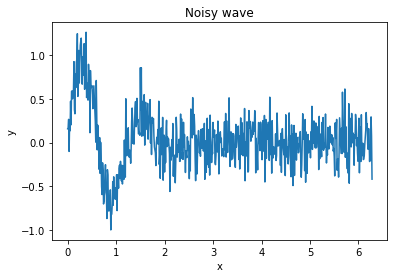

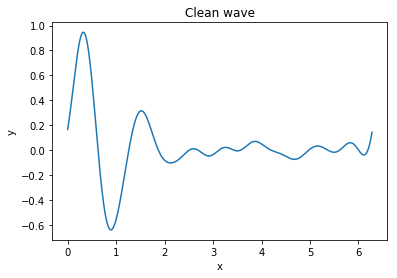

In [32]:
# TODO call noisy_packet() to get a Gaussian wave packet, 
# call clean_data() to apply a low pass filter to the data, and
# finally plot the result using plot_fn
noisy_wave = noisy_packet(arr_x, 5, 1, 0.2)
plot_fn(arr_x, noisy_wave, "Noisy wave")

clean_wave = clean_data(arr_x, noisy_wave)
plot_fn(arr_x, clean_wave, "Clean wave")

# Part 3

In [ ]:
# TODO mask the arrays, then plot

In [ ]:
# TODO try to generate masked noisy data and then clean it